In [100]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
import os

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [101]:
df = pd.read_csv(os.getcwd()+"/직무능력평가.csv",engine='python',encoding='euc-kr')
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [8]:
#군집 분석은 표준화가 필수다 !
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)
df_scaler[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [9]:
#
df_y = df_scaler[:,0]
df_x = df_scaler[:,1::]

Text(0, 0.5, 'sample index')

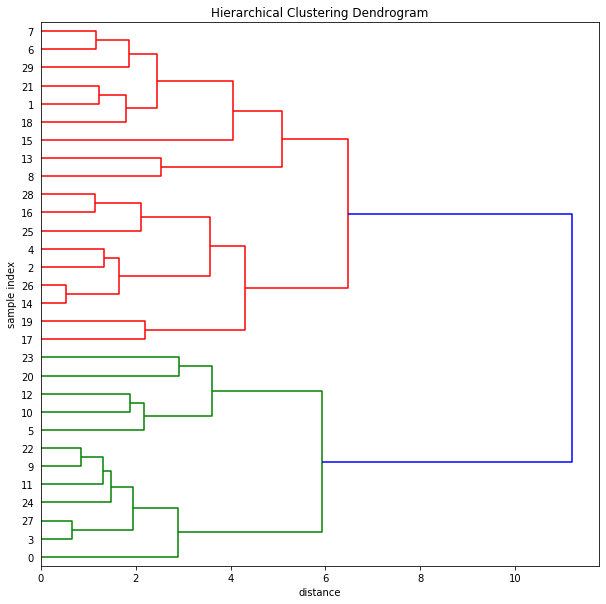

In [14]:
#계층형 군집분석
# 최단, 최장, 평균, 와드, 중앙값 
z_ward = linkage(df_x,method="ward",metric='euclidean')
z_average = linkage(df_x,method="average",metric='euclidean')
z_minko = linkage(df_x,method="average",metric='minkowski')

plt.figure(figsize = (10,10))
ax = plt.subplot(111)
dendrogram(z_ward, leaf_font_size=10,orientation='right')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel('sample index')

In [15]:
cluster_hierachical = fcluster(Z=z_ward, t= 5, criterion='distance')

df["CluterHierarchical"]=cluster_hierachical
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,CluterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [19]:
ds_summary_hc = df.groupby("CluterHierarchical").agg(['min','mean','max'])
# ds_summary_hc
level0=ds_summary_hc.columns.get_level_values(0)
level1=ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns =level0+'_'+level1
ds_summary_hc.reset_index(inplace=True)
ds_summary_hc.round(3)

,CluterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [21]:
#군내 제곱합
n_iter_cluster=15
cluster_range=[i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus=KMeans(v_n_clus)
    clus.fit(df_x)
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"Numberofcluster":cluster_range, "Error":clus_error})
ds_error

,Numberofcluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.932631
3,4,79.567709
4,5,65.847258
5,6,59.802090
6,7,49.937825
7,8,44.883548
8,9,38.861370
9,10,34.338093


Text(0, 0.5, 'Sum of squared distnace')

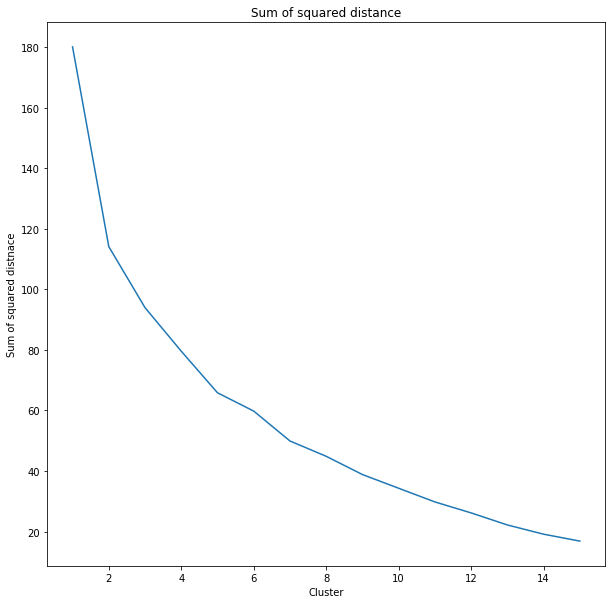

In [22]:
plt.figure(figsize=(10,10))
plt.plot(ds_error["Numberofcluster"],ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Cluster")
plt.ylabel("Sum of squared distnace")

In [23]:
clus = KMeans(5)
clus.fit(df_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df['ClusterKmeans'] = cluster_kmeans
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,CluterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,1
1,63,64,51,54,63,73,47,5,5
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,1
4,81,78,56,66,71,83,47,3,2


In [25]:
ds_summary_km = df.drop("CluterHierarchical", axis=1,inplace = False).groupby("ClusterKmeans").agg(["min","mean",'max'])

level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0+'_'+level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
2,3,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
3,4,40,44.333,50,37,44.000,55,33,41.333,49,...,58,43,49.000,54,49,56.667,64,33,38.667,49
4,5,58,68.556,82,53,69.333,90,39,48.889,57,...,72,55,64.111,75,54,70.444,85,25,38.222,47


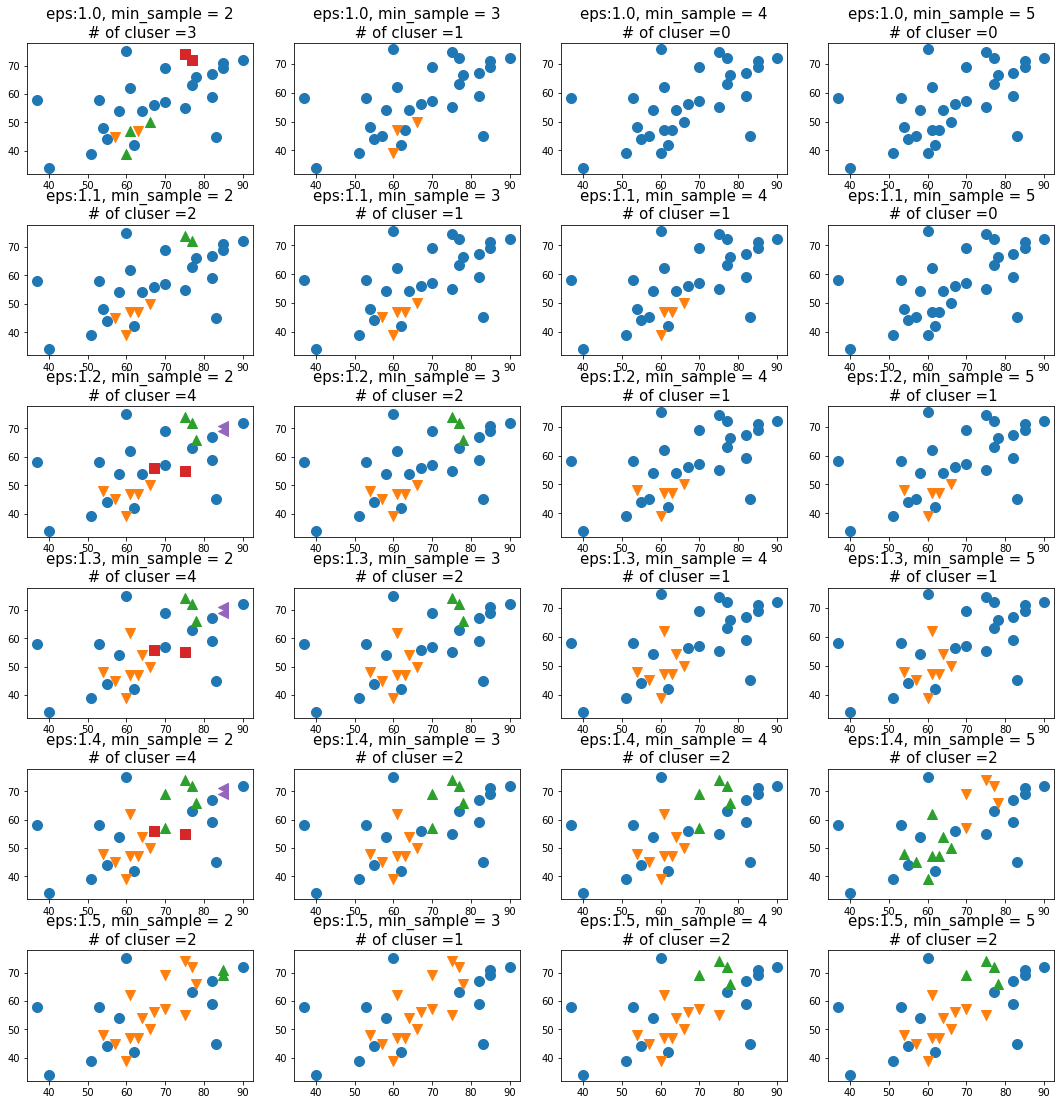

In [31]:
x = df["DISSATIS"]
y = df["CHANCE"]

markers = ['o','v','^','s','<','>','p','D']
para_eps = [k/10 for k in range(10,16,1)]
para_min_sample = [2,3,4,5]
fig , axes = plt.subplots(len(para_eps),len(para_min_sample),figsize=(15,15))
fig.tight_layout(w_pad=1, h_pad=3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps =eps)
        clusters = dbscan.fit_predict(df_x)
        clusters = clusters+1
        for (n_clus,clus) in enumerate(range(min(clusters),max(clusters)+1,1)):
            axes[i,j].scatter(x[clusters==clus], y[clusters==clus], marker=markers[n_clus],s=100)
            axes[i,j].set_title('eps:'+str(eps)+", min_sample = "+str(min_sample)+\
                               '\n # of cluser =' + str(max(clusters)), fontsize=15)



In [36]:
dbscan =DBSCAN(eps=1.4,min_samples=2).fit(df_x)
cluster_dbscan = dbscan.labels_

for (i,val) in enumerate(cluster_dbscan):
    if val<0:
        cluster_dbscan[i]=0
    else:
        cluster_dbscan[i] = cluster_dbscan[i]+1
df['ClusterDBscan']=cluster_dbscan
df.head()


,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,CluterHierarchical,ClusterKmeans,ClusterDBscan
0,43,51,30,39,61,92,45,1,1,0
1,63,64,51,54,63,73,47,5,5,1
2,71,70,68,69,76,86,48,3,2,2
3,61,63,45,47,54,84,35,1,1,1
4,81,78,56,66,71,83,47,3,2,2


In [43]:
ds_summary_db = df.drop(['CluterHierarchical','ClusterKmeans'],
                           axis=1,
                           inplace = False).groupby("ClusterDBscan").agg(['min','mean','max'])

level0=ds_summary_db.columns.get_level_values(0)
level1=ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0+'_'+level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBscan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63


# 연관분석 시작!


In [50]:
df=[['소주','콜라','맥주'],
   ['소주','콜라','와인'],
   ['소주','주스'],
   ['콜라','맥주'],
   ['소주','콜라','맥주','와인'],
    ['주스']]


In [53]:
enc =TransactionEncoder()
df_enc = enc.fit_transform(X=df)
df_asso = pd.DataFrame(df_enc, columns=enc.columns_)
df_asso.head()

,맥주,소주,와인,주스,콜라
0,True,True,False,False,True
1,False,True,True,False,True
2,False,True,False,True,False
3,True,False,False,False,True
4,True,True,True,False,True


In [54]:
## 지지도 구하기 !
min_support = 0.5

df_freq = apriori(df_asso,min_support = 0.5, use_colnames=True)
df_freq.round(3)

,support,itemsets
0,0.500,(맥주)
1,0.667,(소주)
2,0.667,(콜라)
3,0.500,"(콜라, 맥주)"
4,0.500,"(콜라, 소주)"


In [55]:
df_asso_rule = association_rules(df_freq, metric='confidence', min_threshold=0.5)
df_asso_rule.round(3)

#맥주를 산사람은 무조건 콜라를산다 맥주사는 사람한테 콜라 추천!
#콜라를 산사람은 0.75로 맥주를산다.
#소주와 콜라는 독립관계이고 , 콜라와 맥주는 조금더 상관관계 향상도가 높다

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(콜라),(맥주),0.667,0.500,0.5,0.75,1.500,0.167,2.000
1,(맥주),(콜라),0.500,0.667,0.5,1.00,1.500,0.167,inf
2,(콜라),(소주),0.667,0.667,0.5,0.75,1.125,0.056,1.333
3,(소주),(콜라),0.667,0.667,0.5,0.75,1.125,0.056,1.333


In [56]:
df=[['우유','라면'],
   ['라면'],
   ['아이스크림','우유'],
   ['과자','라면'],
   ['아이스크림']]

enc =TransactionEncoder()
df_enc = enc.fit_transform(X=df)
df_asso = pd.DataFrame(df_enc, columns=enc.columns_)
df_asso.head()

,과자,라면,아이스크림,우유
0,False,True,False,True
1,False,True,False,False
2,False,False,True,True
3,True,True,False,False
4,False,False,True,False


In [61]:
## 지지도 구하기 !
min_support = 0.5

df_freq = apriori(df_asso,min_support = 0.01, use_colnames=True)
df_freq.round(3)

,support,itemsets
0,0.2,(과자)
1,0.6,(라면)
2,0.4,(아이스크림)
3,0.4,(우유)
4,0.2,"(라면, 과자)"
5,0.2,"(라면, 우유)"
6,0.2,"(아이스크림, 우유)"


In [60]:
df_asso_rule = association_rules(df_freq, metric='confidence', min_threshold=0.5)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(과자),(라면),0.2,0.6,0.2,1.0,1.667,0.08,inf
1,(우유),(라면),0.4,0.6,0.2,0.5,0.833,-0.04,0.8
2,(아이스크림),(우유),0.4,0.4,0.2,0.5,1.250,0.04,1.2
3,(우유),(아이스크림),0.4,0.4,0.2,0.5,1.250,0.04,1.2


In [64]:
455/460

0.9891304347826086

In [65]:
27/32

0.84375

In [66]:
27/40

0.675

In [70]:
1/((1/0.84375) +(1/0.675))*2

0.75

In [68]:
1/0.675

1.4814814814814814

In [116]:
df = pd.read_csv(os.getcwd()+"/IRIS.csv",engine='python',encoding='euc-kr')
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [117]:
df_train, df_test = train_test_split(df,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)

(105, 5)
(45, 5)


In [118]:
df_train_x = df_train.drop('SPECIES',axis=1)
df_train_y = df_train['SPECIES']

df_test_x = df_test.drop('SPECIES',axis=1)
df_test_y = df_test['SPECIES']

tree=DecisionTreeClassifier(random_state=1234)
tree.fit(df_train_x,df_train_y)

print(tree.score(df_train_x,df_train_y))
print(tree.score(df_test_x,df_test_y))


1.0
0.9777777777777777


In [112]:
tree=DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=10,random_state=1234,criterion='gini')
tree.fit(df_train_x,df_train_y)

print(tree.score(df_train_x,df_train_y))
print(tree.score(df_test_x,df_test_y))

0.9619047619047619
0.9555555555555556


In [113]:
tree=DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=10,random_state=1234,criterion='entropy')
tree.fit(df_train_x,df_train_y)

print(tree.score(df_train_x,df_train_y))
print(tree.score(df_test_x,df_test_y))

0.9619047619047619
0.9555555555555556


In [78]:
df_test_y.value_counts()

versicolor    17
setosa        16
virginica     12
Name: SPECIES, dtype: int64

In [109]:
tmp=[]
for i in df_test_y:
    if i =="versicolor":
        tmp.append(0)
    elif i=='setosa':
        tmp.append(1)
    else: tmp.append(2)
df_test_y=tmp

In [110]:
tmp=[]
for i in df_train_y:
    if i =="versicolor":
        tmp.append(0)
    elif i=='setosa':
        tmp.append(1)
    else: tmp.append(2)
df_train_y=tmp

In [84]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier



/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [119]:
knn=KNeighborsClassifier()
knn.fit(df_train_x,df_train_y)
print(knn.score(df_train_x,df_train_y))
print(knn.score(df_test_x,df_test_y))

0.9714285714285714
1.0


In [122]:
train_accuracy=[];test_accuracy=[]
para_n_neighbors = [i for i in range(1,5)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['Train Accuracy'] = train_accuracy
df_accuracy_neighbors['Test Accuracy'] = test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,Train Accuracy,Test Accuracy
0,1,1.000,0.978
1,2,0.971,0.978
2,3,0.962,0.978
3,4,0.952,0.956


In [87]:
from sklearn.decomposition import PCA
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler


In [88]:
df_raw_x=df.drop("SPECIES",axis=1)
df_raw_y=df["SPECIES"]
df_raw_x.head()
df_raw_y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: SPECIES, dtype: object

In [89]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print("Scaled data : \n{}" .format(nd_scaled[:5].round(3)))
print("Shape : \n{}" .format(nd_scaled.shape))



Scaled data : 
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape : 
(150, 4)


In [91]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [90]:
pca=PCA(n_components=6)
nd_pca=pca.fit_transform(df_scaled)

print(nd_pca[:5])
print(nd_pca.shape)


NameError: name 'df_scaled' is not defined

In [93]:
df = pd.read_csv(os.getcwd()+"/체질검사.csv",engine='python',encoding='euc-kr')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [94]:
df_raw_x=df.drop("FAT",axis=1)
df_raw_y=df["FAT"]
df_raw_x.head()
df_raw_y.head()

0    35.2
1    11.8
2    22.2
3    10.6
4    47.5
Name: FAT, dtype: float64

In [95]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print("Scaled data : \n{}" .format(nd_scaled[:5].round(3)))
print("Shape : \n{}" .format(nd_scaled.shape))



Scaled data : 
[[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183]]
Shape : 
(252, 13)


In [96]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.089,6.281,0.575,5.444,4.205,5.161,6.685,5.324,4.366,3.841,4.221,0.167,3.403
1,-1.422,-0.372,0.301,0.044,-0.930,-1.250,-0.756,-0.402,-0.993,0.826,-1.086,0.663,0.612
2,1.917,-0.040,-0.451,0.292,0.140,0.227,-0.224,-0.841,-0.121,-0.770,-0.489,-1.470,0.612
3,0.963,-1.063,-1.203,-1.151,-0.146,-0.572,-1.371,-1.223,-1.492,-1.066,-0.190,-0.676,-1.427
4,0.486,1.366,-1.682,1.322,2.255,2.745,1.804,0.591,-0.702,0.294,0.805,0.216,0.183


In [97]:
pca=PCA(n_components=6)
nd_pca=pca.fit_transform(df_scaled)

print(nd_pca[:5])
print(nd_pca.shape)


[[15.14078652  0.74918006  1.73038829  2.97562799 -1.20140416  1.91649244]
 [-1.25745311 -1.79805793 -0.60359147 -0.4059414   1.33324667  0.82223682]
 [-0.72744205  2.31886158 -0.89209681  0.68258035 -0.50328047  0.60020938]
 [-3.21015592  1.46511228  0.45790754 -0.57563715  0.01977212 -0.17880332]
 [ 3.24650172  2.29304235  1.82833929 -0.02336594 -0.40697879  1.14656798]]
(252, 6)


In [98]:
df_pca = pd.DataFrame(nd_pca,columns=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()



,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,4.220708,0.166666,3.402526,15.140787,0.749180,1.730388,2.975628,-1.201404,1.916492
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,-1.085611,0.662531,0.612020,-1.257453,-1.798058,-0.603591,-0.405941,1.333247,0.822237
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,-0.488650,-1.469689,0.612020,-0.727442,2.318862,-0.892097,0.682580,-0.503280,0.600209
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,-0.190169,-0.676305,-1.427195,-3.210156,1.465112,0.457908,-0.575637,0.019772,-0.178803
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,0.804765,0.216252,0.182712,3.246502,2.293042,1.828339,-0.023366,-0.406979,1.146568


In [99]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,7)]
df_pca_stat['Eigenvalues']= pca.explained_variance_
df_pca_stat['EigenvaluesRatio']= pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)




,PrinNo,Eigenvalues,EigenvaluesRatio,CumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921
